In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [11]:
#
parler_df = pd.read_csv("parler_annotated_data.csv")

#
parler_df["text_len"] = parler_df.text.str.len()

#
labels = {0: "non-hate", 1: "hate"}
parler_df["label"] = (parler_df["label_mean"] > 3).astype(int)
parler_df["label"] = parler_df["label"].apply(labels.get)


#
parler_df = parler_df[parler_df.label == "hate"]
parler_df = parler_df[(parler_df.text_len < 250) & (parler_df.text_len > 10)].sort_values(by="label_mean", ascending=False)
parler_df


,id,text,label_mean,disputable_post,text_len,label
977,4df1c6e57ae54be19a89acc8f3448083,My Advise today. Do not ever trust a Muslim. I...,5.00,False,81,hate
6741,8f3262cc3a724196923140bc32dd6eb8,There was a vile man called obama \nWhos face ...,5.00,False,167,hate
7243,588befa8b4554765a1b000f2e7ce2912,"ICE deportation flight, objected to by Omar ov...",5.00,False,174,hate
953,c5014eb05ecc4ce49c0664182caabf0c,Apparently at 10:01 covid is more contagious a...,5.00,False,227,hate
529,23e9f9dd27c749eea02268b80c0ca657,All these females suddenly wanna be decent and...,5.00,False,137,hate
...,...,...,...,...,...,...
51,6a5c4ca0f6d04245a5ccdbaa85e25b11,Illegals No Longer Evade Capture. They Want to...,3.25,False,165,hate
78,70b5fca7b40b4f2486c7514c43834ce8,Time for the Yo'Mamas to fade into the sunset ...,3.25,True,149,hate
223,5caf9105bf94474094723bd19c89eeff,Yep pork for everybody but American taxpayers,3.20,False,45,hate
159,3fe582f7ba5a4fff808046c7e17ca684,"These thugs are not peaceful, and their intent...",3.20,False,55,hate


In [12]:
parler_df.to_csv("to_select_from.csv", index=False)

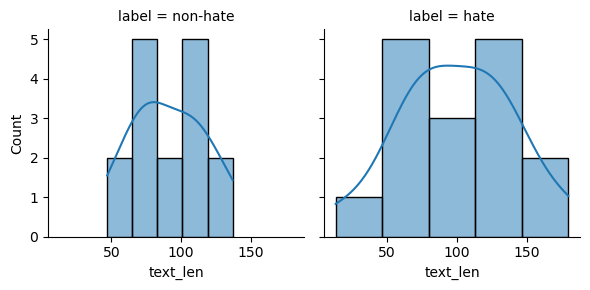

In [29]:
g = sns.FacetGrid(parler_df, col="label")
g.map(sns.histplot, "text_len", kde=True)
plt.show()

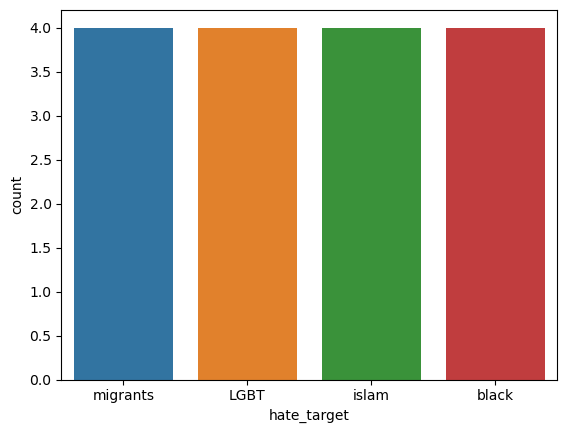

In [6]:
sns.countplot(parler_df, x="hate_target")
plt.show()